In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from data_preprocessing_final import *

In [ ]:
#set columns
pd.set_option("display.max_columns",None)

#set rows
pd.set_option("display.max_rows",None)

In [23]:
df = pd.read_csv("./data/Ames_Housing_Price_Data.csv", index_col=0) #load df

In [24]:
df = cleaning(df) #calling the cleaning function from data_preprocessing_final

In [25]:
df.shape

(2578, 81)

In [29]:
factors,Y = dummify_func(df) # running dummifying function, returns factors and sales (dependent variable)

# Attempt on Ridge Regression
- selecting 0.1, 1.0, 10.0 for my alpha testing
- will also do a train/test sample 75/25

In [36]:
# creating our test/train data
x_train, x_test, Y_train, Y_test = train_test_split(factors, Y, test_size=0.25, random_state=0)

In [43]:
ridge = Ridge()

### Attempt 1 - without train/test data (alpha = 1)

In [69]:
ridge.set_params(alpha=1, normalize=False)
ridge.fit(factors,Y)
ridge.score(factors,Y) #R-squared is 0.9322 with standard

C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.67146e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.9321952483376691

### Attempt 2 - with train/test data 
- alpha from really small to 200
- 20 alphas
- graphs to show coefficient and R2 against alpha

In [110]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha, normalize=False)  
          ridge.fit(x_train,Y_train)
          intercepts.append(ridge.intercept_)
          coefs.append(ridge.coef_)
          R2.append(ridge.score(x_train,Y_train))  

C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10853e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.18437e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15794e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68892e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22214e-1

In [111]:
print(ridge.get_params())
print("Train R-Squared:", ridge.score(x_train,Y_train))
print("Test R-Squared:", ridge.score(x_test,Y_test))

# this is when alpha is 200.. need to find the best alpha

{'alpha': 200.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Train R-Squared: 0.787997656887952
Test R-Squared: 0.8244807863783551


In [113]:
# creating default graph settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (7,7)

Text(0.5, 1.0, 'Change of Ridge Intercept Varying Alpha')

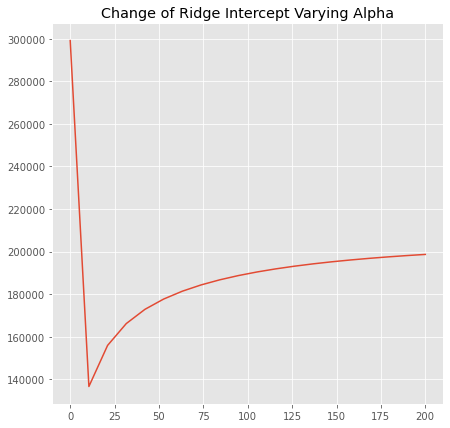

In [114]:
plt.plot(alphaRange, intercepts)
plt.title('Change of Ridge Intercept Varying Alpha')

# weird, i would expect the line to keep going toward 0

Text(0.5, 1.0, 'Change of $R^2$ Varying Alphas')

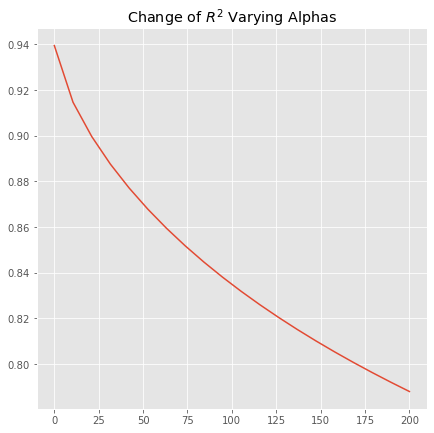

In [115]:
plt.plot(alphaRange, R2)
plt.title(r'Change of $R^2$ Varying Alphas')

# this seems to make sense R-squared goes down as alpha increases

### Attempt 3 - see how our test data comes out
- store R-squared values for both and compare
- graph to find optimal alpha level to use for final fit

In [94]:
train_R2 = []
test_R2  = []
alphaRange = np.linspace(1e-3,200,20)
for alpha in alphaRange:
          ridge.set_params(alpha=alpha, normalize=False)  
          ridge.fit(x_train,Y_train)
          train_R2.append(ridge.score(x_train,Y_train))
          test_R2.append(ridge.score(x_test,Y_test))

C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.10853e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.18437e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.15794e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.68892e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22214e-1

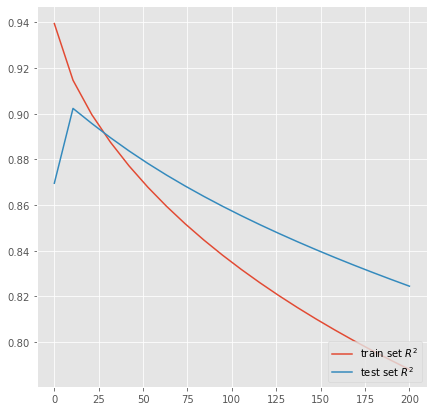

In [95]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.legend(loc=4)

In [104]:
factors.columns #weird 332 length so it should work

Index(['PID', 'GrLivArea', 'LotArea', 'YearBuilt', 'YearRemodAdd', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'FullBath', 'HalfBath',
       ...
       'MiscVal_560', 'MiscVal_600', 'MiscVal_650', 'MiscVal_6500',
       'MiscVal_700', 'MiscVal_750', 'MiscVal_80', 'MiscVal_800',
       'MiscVal_8300', 'MiscVal_900'],
      dtype='object', length=332)

In [99]:
ridge.set_params(alpha=30)
ridge.fit(factors, Y)
coefDF = pd.Series(ridge.coef_, index=factors.columns) #not sure why this wasn't working
print('The intercept is %.4f' %(ridge.intercept_))
print('The slopes are \n %s' %(coefDF))

C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28086e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


ValueError: Length of passed values is 1, index implies 332.

In [117]:
#appears optimal alpha is around 30

ridge.set_params(alpha=30)
ridge.fit(factors, Y)
print(ridge.get_params())
print("Train R-Squared:", ridge.score(x_train,Y_train))
print("Test R-Squared:", ridge.score(x_test,Y_test))

{'alpha': 30, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Train R-Squared: 0.8917310193202602
Test R-Squared: 0.912674220992185


C:\Users\David Jhang\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.28086e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
